<a href="https://colab.research.google.com/github/AddankiVasavi/Custom-Convolutional-Neural-Network-for-Cotton-Diseases-Classification-/blob/main/Mini_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras import models
my_model= models.Sequential()

# Add first convolutional block
my_model.add(Conv2D(16, (3, 3), activation='relu', padding='same',
                    input_shape=(178,218,3)))
my_model.add(MaxPooling2D((2, 2), padding='same'))

# second block
my_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# third block
my_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
my_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))

# global average pooling
my_model.add(GlobalAveragePooling2D())
# fully connected layer
my_model.add(Dense(64, activation='relu'))
my_model.add(BatchNormalization())
# make predictions
my_model.add(Dense(3, activation='sigmoid'))


# Show a summary of the model. Check the number of trainable parameters
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 109, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 109, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 55, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 28, 64)        0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# save best model automatically
mc= ModelCheckpoint('/content/my_model.h5', monitor='val_loss',
                    mode='min', verbose=1, save_best_only=True)
cb_list=[es,mc]


# compile model
my_model.compile(optimizer='adam', loss='categorical_crossentropy',
                 metrics=['accuracy'])




In [ ]:
pip install tensorflow

In [ ]:
import tensorflow
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


# set up data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# get batches of training images from the directory
train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/cotton/train_cotton',
        target_size=(178, 218),
        batch_size=128,
        class_mode='categorical')

# get batches of validation images from the directory
validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/cotton/valid_cotton',
        target_size=(178, 218),
        batch_size=128,
        class_mode='categorical')


history = my_model.fit(
        train_generator,
        epochs=5,
        steps_per_epoch=10,
        validation_data=validation_generator,
        validation_steps=10, callbacks=cb_list)

Found 1308 images belonging to 3 classes.
Found 110 images belonging to 3 classes.
Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 0.9625 - accuracy: 0.5771 


Epoch 00001: val_loss improved from inf to 1.06649, saving model to /content/my_model.h5
10/10 [==============================] - 260s 25s/step - loss: 0.9625 - accuracy: 0.5771 - val_loss: 1.0665 - val_accuracy: 0.6818
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 0.5584 - accuracy: 0.7539

10/10 [==============================] - 79s 8s/step - loss: 0.5584 - accuracy: 0.7539
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.8246

10/10 [==============================] - 76s 7s/step - loss: 0.4492 - accuracy: 0.8246
Epoch 4/5
10/10 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.8610

10/10 [==============================] - 74s 7s/step - loss: 0.3772 - accuracy: 0.8610
Epoch 5/5
10/10 [==============================] - ETA: 0s - loss: 0.3447 - accuracy: 0.8831

10/10 [==============================] - 71s 7s/step - loss: 0.3447 - accuracy: 0.8831


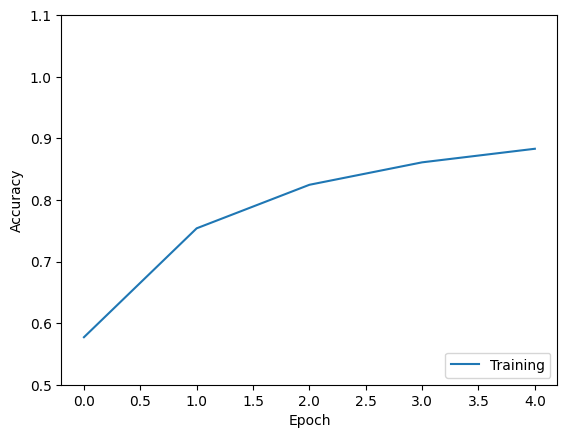

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])  # 'accuracy' for training accuracy
plt.plot(history.history['val_accuracy'])  # 'val_accuracy' for validation accuracy
plt.ylim([0.5, 1.1])  # You can adjust the y-axis limits as needed
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='lower right')
plt.show()


In [ ]:
from keras.models import load_model
import os
os.chdir('/content/drive')
saved_model = load_model('/content/my_model.h5')

In [ ]:
test_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/cotton/test_cotton',
        target_size=(178, 218),
        batch_size=9,
        class_mode='categorical',
        shuffle=False)

Found 9 images belonging to 3 classes.


1/9 [==>...........................] - ETA: 4s

9/9 [==============================] - 1s 4ms/step
3
['/content/drive/MyDrive/cotton/test_cotton/test_bact/bact96.jpg', '/content/drive/MyDrive/cotton/test_cotton/test_bact/bact110.jpeg', '/content/drive/MyDrive/cotton/test_cotton/test_bact/bact61.jpg', '/content/drive/MyDrive/cotton/test_cotton/test_curl/curl270.jpeg', '/content/drive/MyDrive/cotton/test_cotton/test_curl/curl257.jpg', '/content/drive/MyDrive/cotton/test_cotton/test_curl/curl308.jpg', '/content/drive/MyDrive/cotton/test_cotton/test_fuswilt/fus207.jpg', '/content/drive/MyDrive/cotton/test_cotton/test_fuswilt/fus263.jpg', '/content/drive/MyDrive/cotton/test_cotton/test_fuswilt/fus270.jpeg']
Fusarium Wilt


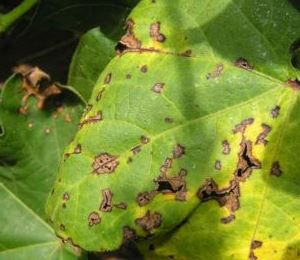

Bacterial Blight


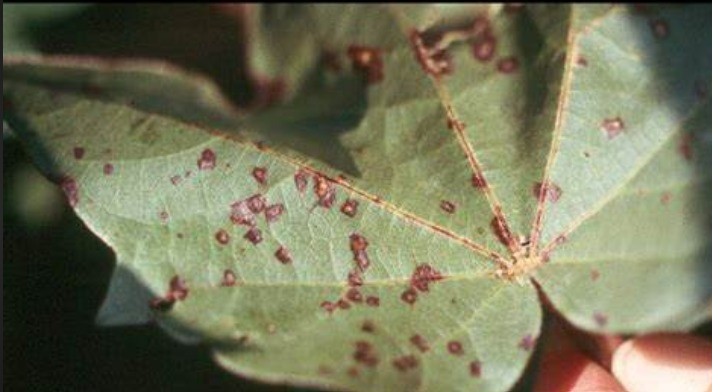

Bacterial Blight


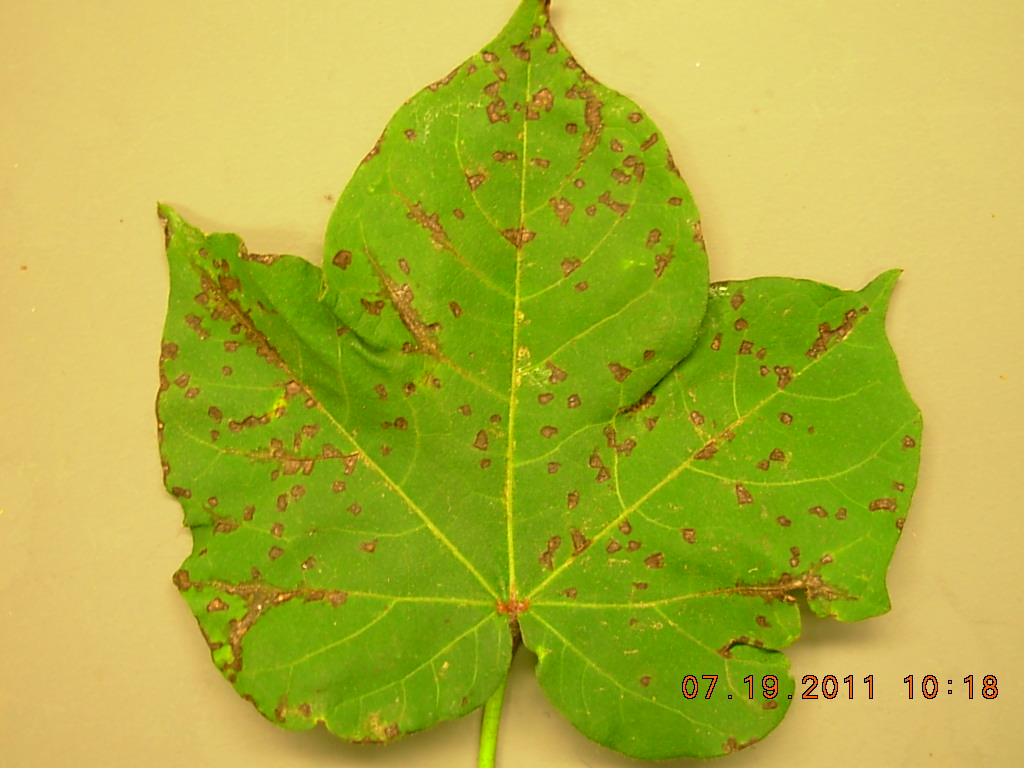

Bacterial Blight


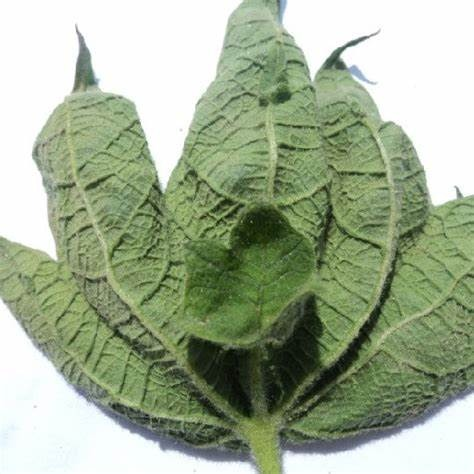

Fusarium Wilt


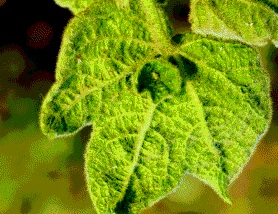

Bacterial Blight


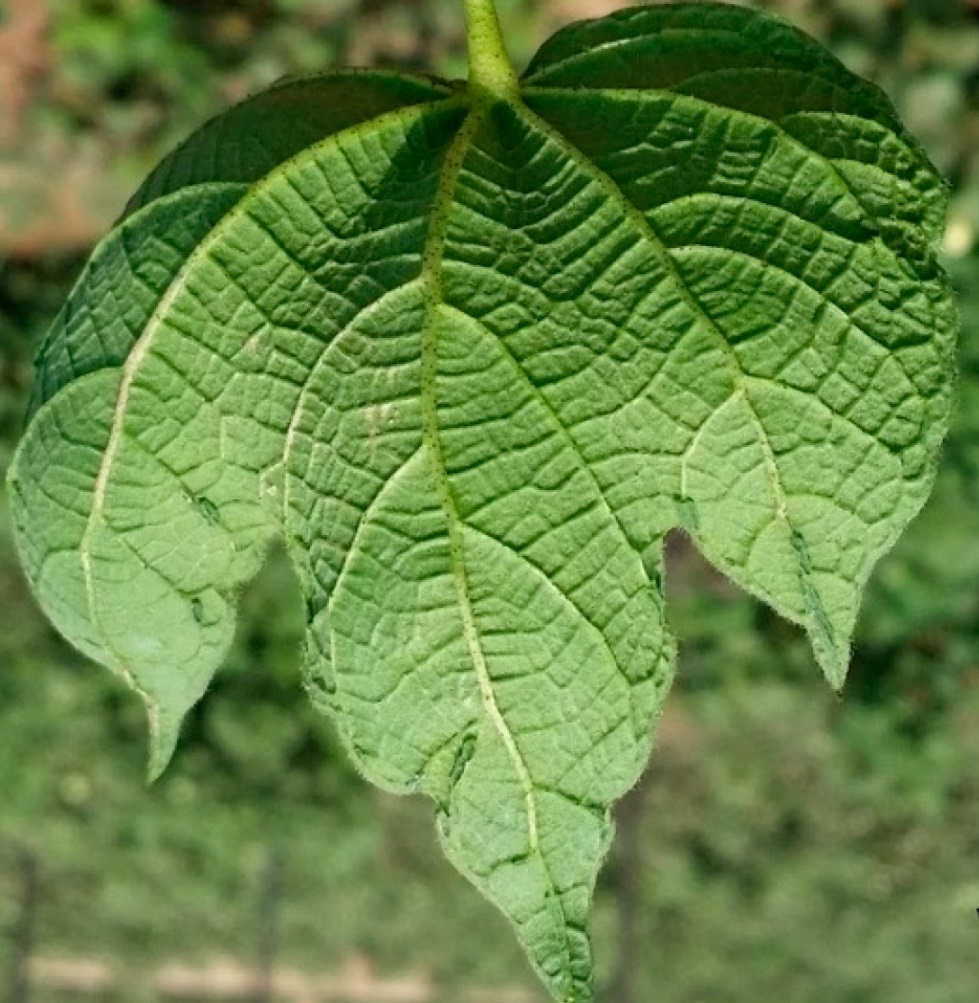

Fusarium Wilt


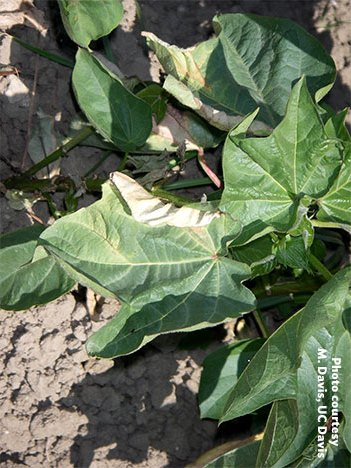

Fusarium Wilt


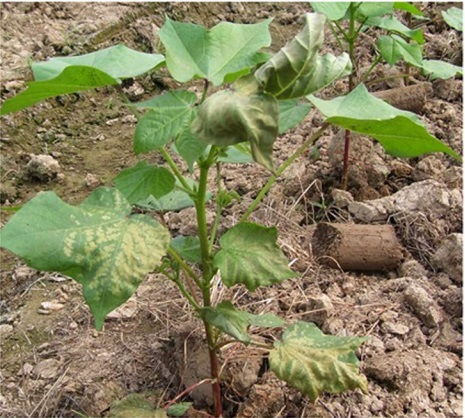

Fusarium Wilt


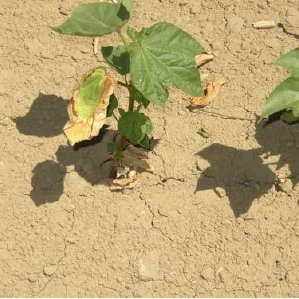

['Bacterial Blight', 'Bacterial Blight', 'Bacterial Blight', 'Leaf curl', 'Leaf curl', 'Leaf curl', 'Fusarium Wilt', 'Fusarium Wilt', 'Fusarium Wilt']
['Fusarium Wilt', 'Bacterial Blight', 'Bacterial Blight', 'Bacterial Blight', 'Fusarium Wilt', 'Bacterial Blight', 'Fusarium Wilt', 'Fusarium Wilt', 'Fusarium Wilt']
55.55555555555556
                  precision    recall  f1-score   support

Bacterial Blight       0.50      0.67      0.57         3
   Fusarium Wilt       0.60      1.00      0.75         3
       Leaf curl       0.00      0.00      0.00         3

        accuracy                           0.56         9
       macro avg       0.37      0.56      0.44         9
    weighted avg       0.37      0.56      0.44         9

[[2 1 0]
 [0 3 0]
 [2 1 0]]
['Bacterial Blight', 'Bacterial Blight', 'Bacterial Blight', 'Leaf curl', 'Leaf curl', 'Leaf curl', 'Fusarium Wilt', 'Fusarium Wilt', 'Fusarium Wilt']
['Fusarium Wilt', 'Bacterial Blight', 'Bacterial Blight', 'Bacterial Blight',

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


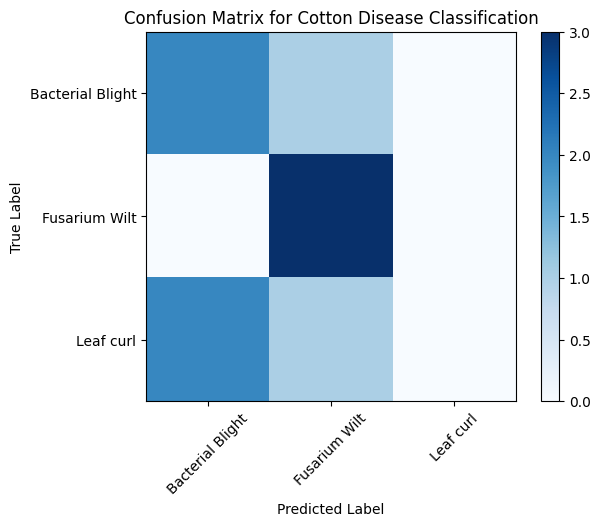

In [ ]:
import numpy as np
from google.colab import files
from IPython.display import Image
from keras.preprocessing import image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_path=[]
Test_label=[]
test_generator.reset()
pred=saved_model.predict(test_generator, verbose=1, steps=9)
# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)

# label each predicted value to correct gender
test_list=['/content/drive/MyDrive/cotton/test_cotton/test_bact','/content/drive/MyDrive/cotton/test_cotton/test_curl','/content/drive/MyDrive/cotton/test_cotton/test_fuswilt']
print(len(test_list))
for index in range(len(test_list)):
  for image in os.listdir(test_list[index]):
    test_path.append(os.path.join(test_list[index], image))
print(test_path)

for i in range(3):
  Test_label.append("Bacterial Blight")
for i in range(3):
  Test_label.append("Leaf curl")
for i in range(3):
  Test_label.append("Fusarium Wilt")
#labels = (test_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
labels = {
    0: 'Bacterial Blight',
    1: 'Leaf curl',
    2: 'Fusarium Wilt'
}
unique_label = np.unique(Test_label)

predictions = [labels[k] for k in predicted_class_indices]

# format file names to simply male or female
filenames=test_generator.filenames
filenz=[0]
for i in range(0,len(filenames)):
    filenz.append(filenames[i].split('\\')[0])
filenz=filenz[1:]

# determine the test set accuracy
match=[]
for i in range(0,len(filenames)):
    match.append(Test_label[i]==predictions[i])
p=match.count(True)/9
for i in range(len(predictions)):
  print(predictions[i])
  pil_img = Image(filename=test_path[i], width=150, height=150)
  display(pil_img)

print(Test_label)
print(predictions)
print(p*100)
cm = confusion_matrix(list(Test_label),predictions)
cr=classification_report(list(Test_label),predictions)
print(cr)
print(cm)
plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Cotton Disease Classification')
plt.colorbar()
tick_marks = np.arange(len(unique_label))
plt.xticks(tick_marks, unique_label, rotation=45)
plt.yticks(tick_marks, unique_label)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
print(Test_label)
print(predictions)
print(p*100)

In [ ]:
from flask import Flask, render_template, request
from keras.models import load_model
from keras.preprocessing import image

app = Flask(__name__)

dic = {0 : 'Bacterial Blight', 1 : 'Leaf Curl', 2: 'Fuserium wilt'}

model = load_model('model.h5')

model.make_predict_function()

def predict_label(img_path):
	i = image.load_img(img_path, target_size=(100,100))
	i = image.img_to_array(i)/255.0
	i = i.reshape(1, 100,100,3)
	p = model.predict_classes(i)
	return dic[p[0]]


# routes
@app.route("/", methods=['GET', 'POST'])
def main():
	return render_template("index.html")

@app.route("/about")
def about_page():
	return "Please subscribe  Artificial Intelligence Hub..!!!"

@app.route("/submit", methods = ['GET', 'POST'])
def get_output():
	if request.method == 'POST':
		img = request.files['my_image']

		img_path = "static/" + img.filename
		img.save(img_path)

		p = predict_label(img_path)

	return render_template("index.html", prediction = p, img_path = img_path)


if __name__ =='__main__':
	#app.debug = True
	app.run(debug = True)